In [2]:
pip install pandas



SyntaxError: invalid syntax (1048225456.py, line 1)

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('openings.csv')

In [38]:
print(df.head(10))

   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   
5           5     Alekhine Defense, Four Pawns Attack, Main Line  white   
6           6  Alekhine Defense, Four Pawns Attack, Trifunovi...  black   
7           7                          Alekhine Defense, General  black   
8           8  Alekhine Defense, Hunt Variation, Lasker Simul...  white   
9           9                Alekhine Defense, Maroczy Variation  white   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1884 non-null   int64  
 1   Opening         1884 non-null   object 
 2   Colour          1884 non-null   object 
 3   Num Games       1884 non-null   int64  
 4   ECO             1884 non-null   object 
 5   Last Played     1884 non-null   object 
 6   Perf Rating     1884 non-null   int64  
 7   Avg Player      1884 non-null   int64  
 8   Player Win %    1884 non-null   float64
 9   Draw %          1884 non-null   float64
 10  Opponent Win %  1884 non-null   float64
 11  Moves           1884 non-null   object 
 12  moves_list      1884 non-null   object 
 13  move1w          1884 non-null   object 
 14  move1b          1869 non-null   object 
 15  move2w          1814 non-null   object 
 16  move2b          1744 non-null   object 
 17  move3w          1628 non-null   o

In [48]:
### Obertures més jugades
top_openings = df.groupby("Opening")["Num Games"].sum().reset_index()
top_openings = top_openings.sort_values(by="Num Games", ascending=False).head(10)

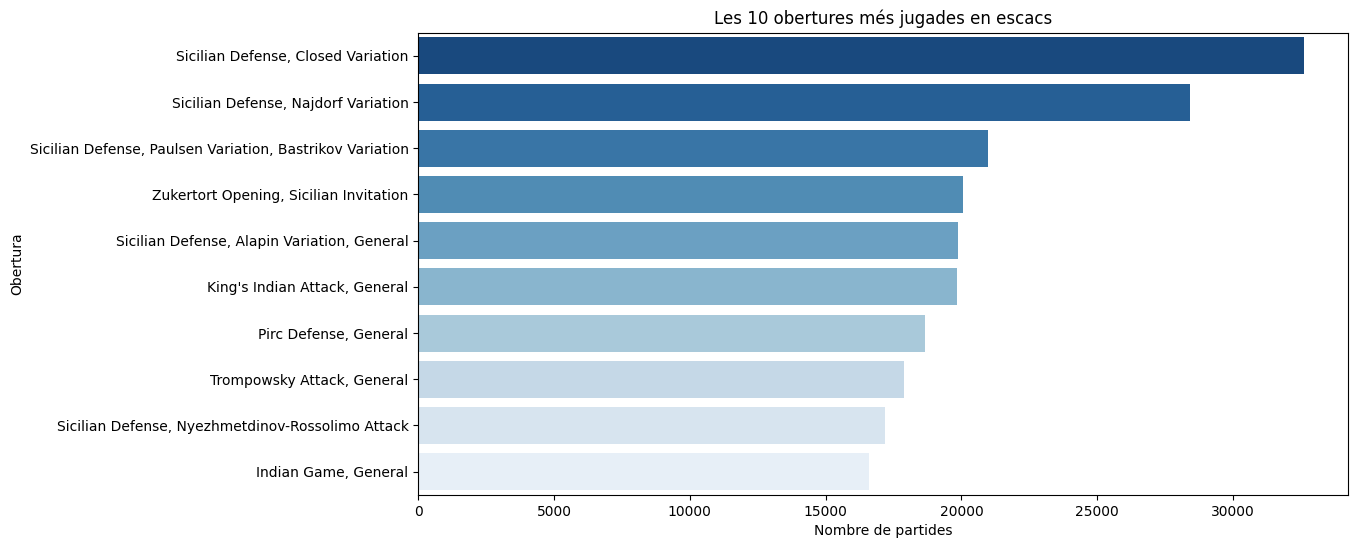

In [41]:
# Gràfic de barres
plt.figure(figsize=(12,6))
sns.barplot(x="Num Games", y="Opening", data=top_openings, hue="Opening", palette="Blues_r", legend=False)
plt.xlabel("Nombre de partides")
plt.ylabel("Obertura")
plt.title("Les 10 obertures més jugades en escacs")
plt.show()

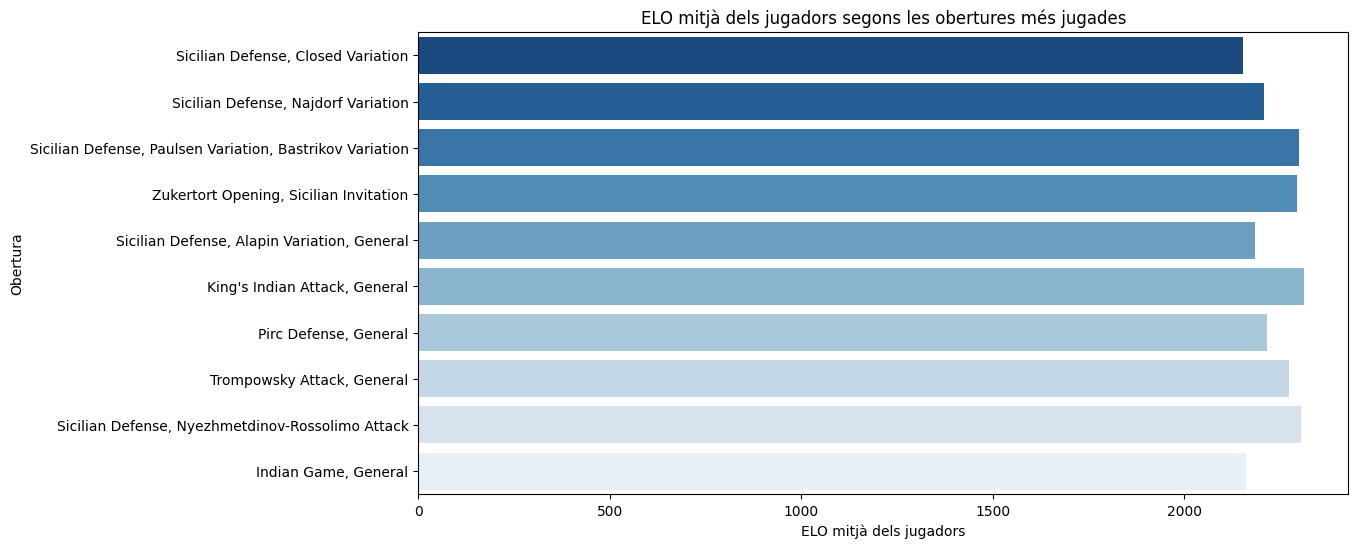

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x="Avg Player", y="Opening", data=top_openings, hue="Opening", palette="Blues_r", legend=False)
plt.xlabel("ELO mitjà dels jugadors")
plt.ylabel("Obertura")
plt.title("ELO mitjà dels jugadors segons les obertures més jugades")
plt.show()

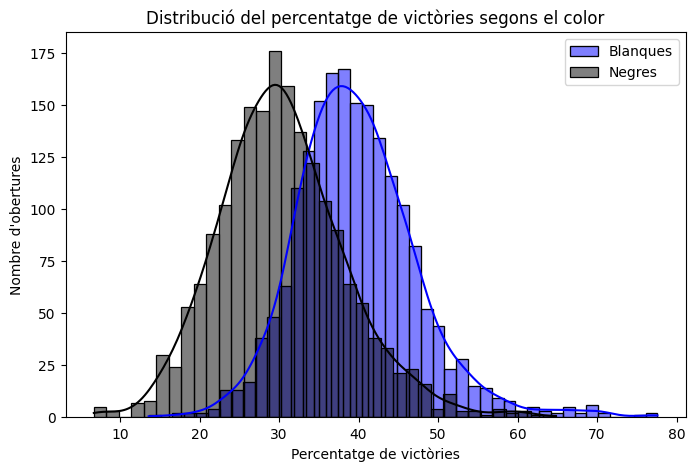

In [8]:
### Percentatge de victòries per color ###
plt.figure(figsize=(8,5))
sns.histplot(df["White_win%"], kde=True, color="blue", label="Blanques")
sns.histplot(df["Black_win%"], kde=True, color="black", label="Negres")
plt.legend()
plt.xlabel("Percentatge de victòries")
plt.ylabel("Nombre d'obertures")
plt.title("Distribució del percentatge de victòries segons el color")
plt.show()

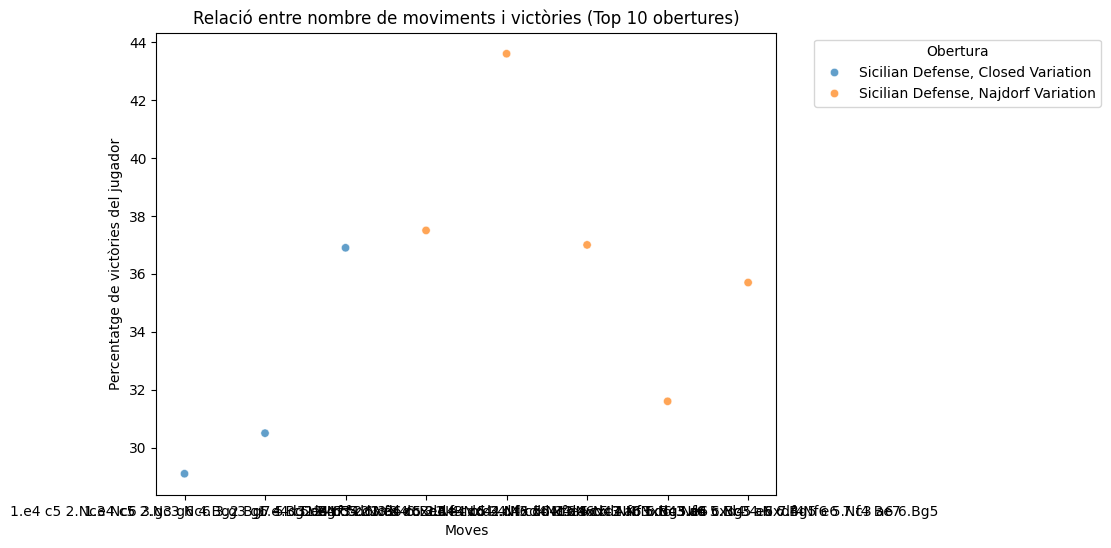

In [17]:
# Seleccionar les 10 obertures més jugades
top_openings = df.groupby("Opening")["Num Games"].sum().nlargest(2).index
df_top = df[df["Opening"].isin(top_openings)]

# Gràfic de dispersió limitat a les 10 obertures més famoses
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_top["Moves"], y=df_top["Player Win %"], hue=df_top["Opening"], alpha=0.7)
plt.ylabel("Percentatge de victòries del jugador")
plt.title("Relació entre nombre de moviments i victòries (Top 10 obertures)")
plt.legend(title="Obertura", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [25]:
df["Colour"].value_counts(normalize=True) * 100


Colour
black    52.653928
white    47.346072
Name: proportion, dtype: float64

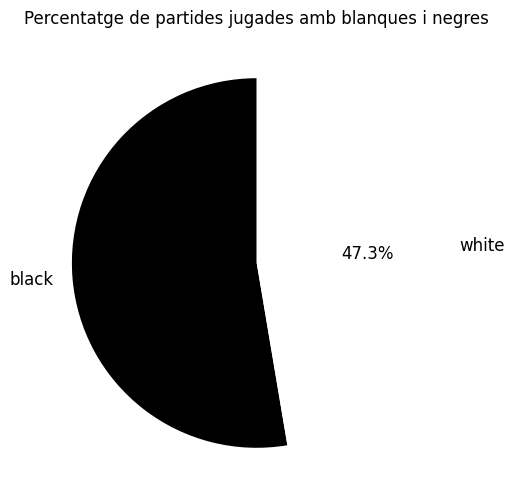

In [26]:
# Comptem el nombre de partides per color
color_counts = df["Colour"].value_counts()

# Definim colors inversos
colors = ["black", "white"]

# Creem el gràfic de sectors
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", 
                                   colors=colors, startangle=90, textprops={'fontsize': 12})

# Canviem el color del text "Black" a blanc perquè es vegi bé sobre el fons negre
for text, color in zip(texts, colors):
    if text.get_text() == "Black":
        text.set_color("white")

plt.title("Percentatge de partides jugades amb blanques i negres")
plt.show()




/tmp/ipykernel_80/2778164414.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=draw_rates.values, y=draw_rates.index, palette="coolwarm")


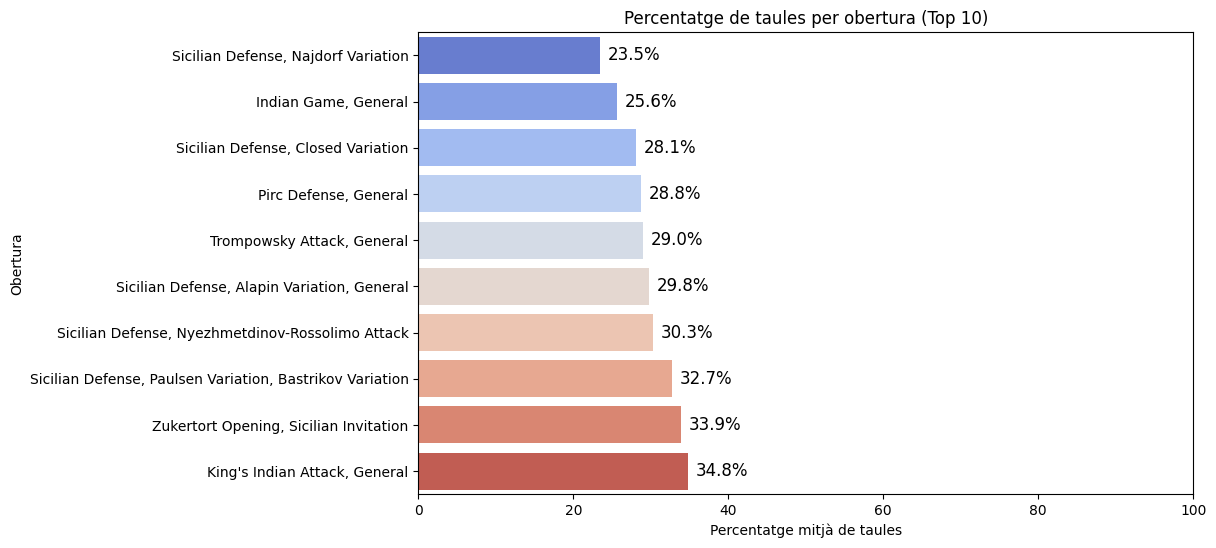

In [22]:
# Seleccionar les 10 obertures més jugades
top_openings = df.groupby("Opening")["Num Games"].sum().nlargest(10).index
df_top = df[df["Opening"].isin(top_openings)]

# Calcular la mitjana de percentatge de taules per obertura
draw_rates = df_top.groupby("Opening")["Draw %"].mean().sort_values()

# Crear el gràfic de barres
plt.figure(figsize=(10,6))
sns.barplot(x=draw_rates.values, y=draw_rates.index, palette="coolwarm")

# Format del gràfic
plt.xlabel("Percentatge mitjà de taules")
plt.ylabel("Obertura")
plt.title("Percentatge de taules per obertura (Top 10)")
plt.xlim(0, 100)

# Afegir els valors sobre les barres
for index, value in enumerate(draw_rates):
    plt.text(value + 1, index, f"{value:.1f}%", va="center", fontsize=12)

plt.show()


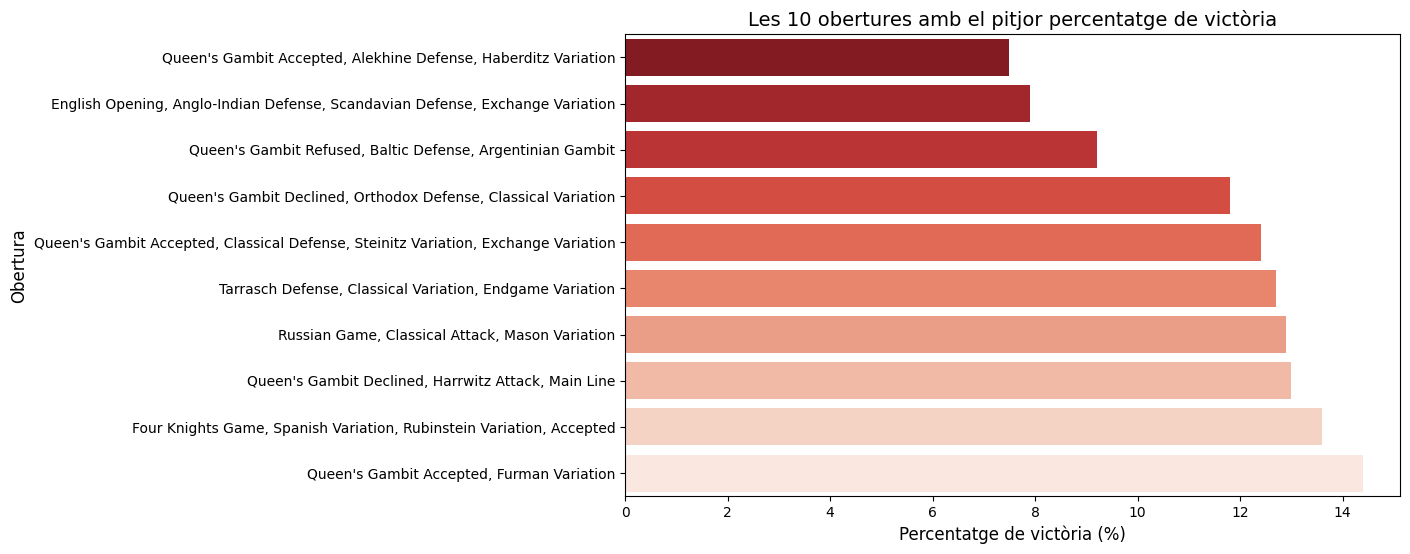

In [8]:
# Ordenem les obertures segons el percentatge de victòria del jugador i seleccionem les 10 pitjors
worst_openings = df.nsmallest(10, "Player Win %")

# Configurem l'estil del gràfic
plt.figure(figsize=(10,6))
sns.barplot(x="Player Win %", y="Opening", data=worst_openings, palette="Reds_r", hue="Opening", legend=False)

# Configurem les etiquetes i el títol
plt.xlabel("Percentatge de victòria (%)", fontsize=12)
plt.ylabel("Obertura", fontsize=12)
plt.title("Les 10 obertures amb el pitjor percentatge de victòria", fontsize=14)

# Mostrem el gràfic
plt.show()